In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

import utilities

In [2]:
data_dir = os.path.join('data', 'cats-and-dogs-filtered')

train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

train_cat_dir = os.path.join(data_dir, 'train', 'cats')
train_dog_dir = os.path.join(data_dir, 'train', 'dogs')

val_cat_dir = os.path.join(data_dir, 'validation', 'cats')
val_dog_dir = os.path.join(data_dir, 'validation', 'dogs')

test_dir = os.path.join('data', 'cats-and-dogs-test')

In [4]:
catdog_gen_aug = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)
train_data_aug = catdog_gen_aug.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

catdog_gen = ImageDataGenerator(rescale=1/255)
val_data = catdog_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
import urllib

weight_url = ('https://storage.googleapis.com/mledu-datasets/'
              'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
weight_dir = os.path.join('nn', 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

urllib.request.urlretrieve(weight_url, weight_dir)

('nn\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
 <http.client.HTTPMessage at 0x1d3176061f0>)

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained.load_weights(weight_dir)

for layer in pre_trained.layers:
    layer.trainable = False

In [6]:
pre_trained.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [7]:
last_layer = pre_trained.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [16]:
x = keras.layers.Flatten()(last_output)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(pre_trained.input, x)

In [17]:
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=['accuracy']
)

In [18]:
%%time

history = model.fit(
    train_data_aug,
    epochs=20,
    validation_data=val_data
)

Epoch 1/20
100/100 [==============================] - 11s 86ms/step - loss: 24.1213 - accuracy: 0.8105 - val_loss: 0.3410 - val_accuracy: 0.8860
Epoch 2/20
100/100 [==============================] - 8s 80ms/step - loss: 0.4459 - accuracy: 0.8785 - val_loss: 0.2464 - val_accuracy: 0.9350
Epoch 3/20
100/100 [==============================] - 8s 80ms/step - loss: 0.5511 - accuracy: 0.8720 - val_loss: 0.5764 - val_accuracy: 0.8980
Epoch 4/20
100/100 [==============================] - 8s 80ms/step - loss: 0.3997 - accuracy: 0.9120 - val_loss: 0.2125 - val_accuracy: 0.9590
Epoch 5/20
100/100 [==============================] - 8s 81ms/step - loss: 0.2933 - accuracy: 0.9215 - val_loss: 0.4619 - val_accuracy: 0.9450
Epoch 6/20
100/100 [==============================] - 8s 80ms/step - loss: 0.4514 - accuracy: 0.8965 - val_loss: 0.2136 - val_accuracy: 0.9280
Epoch 7/20
100/100 [==============================] - 8s 80ms/step - loss: 0.3158 - accuracy: 0.9085 - val_loss: 0.1791 - val_accuracy: 0.95

1/1 [==============================] - 0s 16ms/step


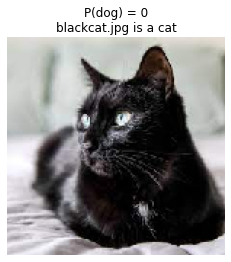

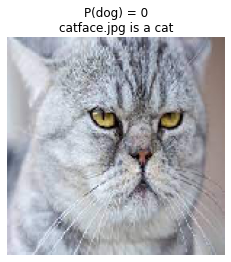

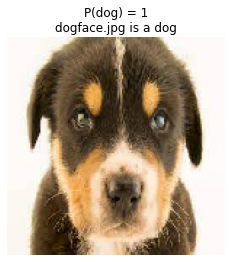

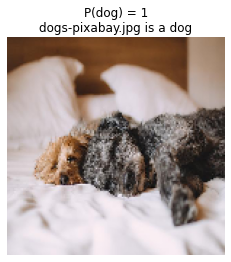

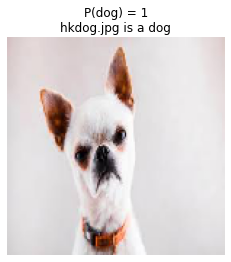

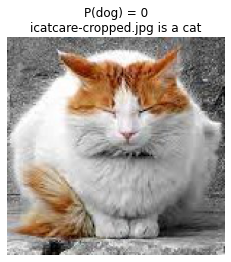

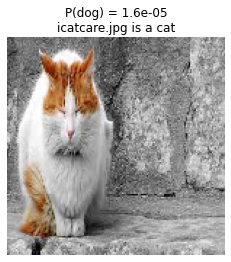

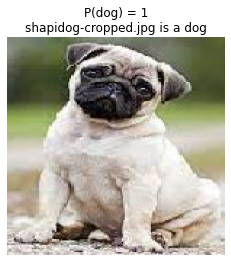

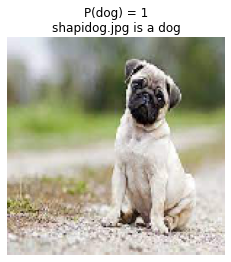

In [19]:
utilities.pred_binary_dir(model, test_dir, cat0='cat', cat1='dog')

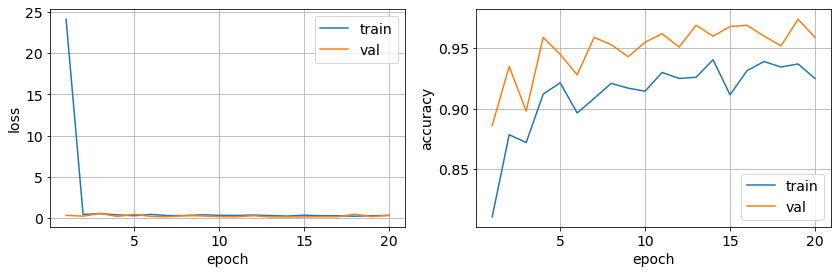

In [20]:
utilities.plot_train_val_metrics(history, ('loss','accuracy'))

In [25]:
x2 = keras.layers.Flatten()(last_output)
x2 = keras.layers.Dense(1024, activation='relu')(x2)
x2 = keras.layers.Dropout(0.2)(x2)
x2 = keras.layers.Dense(1, activation='sigmoid')(x2)

model2 = keras.Model(pre_trained.input, x2)

model2.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=['accuracy']
)

In [26]:
%%time

history2 = model2.fit(
    train_data_aug,
    epochs=20,
    validation_data=val_data
)

Epoch 1/20
100/100 [==============================] - 11s 86ms/step - loss: 21.9218 - accuracy: 0.8215 - val_loss: 1.3477 - val_accuracy: 0.9290
Epoch 2/20
100/100 [==============================] - 8s 80ms/step - loss: 1.6660 - accuracy: 0.8700 - val_loss: 0.5795 - val_accuracy: 0.9390
Epoch 3/20
100/100 [==============================] - 8s 81ms/step - loss: 1.0487 - accuracy: 0.8810 - val_loss: 0.8568 - val_accuracy: 0.9100
Epoch 4/20
100/100 [==============================] - 8s 81ms/step - loss: 1.1189 - accuracy: 0.8870 - val_loss: 1.1385 - val_accuracy: 0.8890
Epoch 5/20
100/100 [==============================] - 8s 82ms/step - loss: 0.9334 - accuracy: 0.9070 - val_loss: 0.4198 - val_accuracy: 0.9520
Epoch 6/20
100/100 [==============================] - 8s 80ms/step - loss: 0.9401 - accuracy: 0.8950 - val_loss: 0.5660 - val_accuracy: 0.9390
Epoch 7/20
100/100 [==============================] - 8s 80ms/step - loss: 0.6067 - accuracy: 0.8975 - val_loss: 0.1523 - val_accuracy: 0.97

1/1 [==============================] - 0s 16ms/step


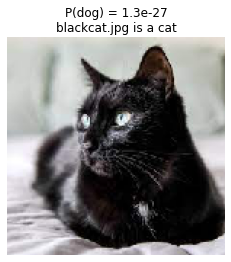

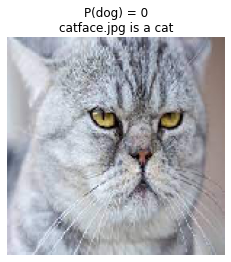

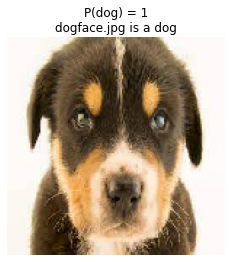

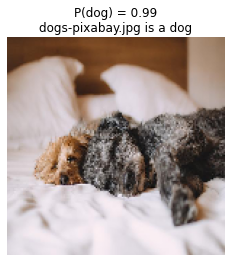

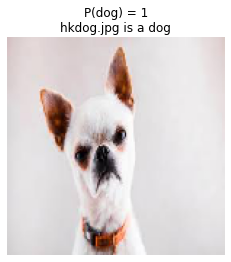

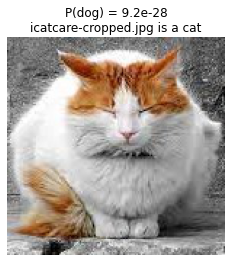

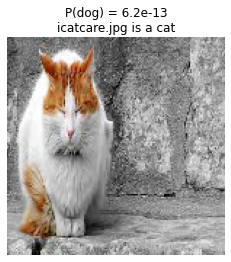

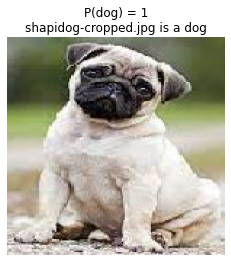

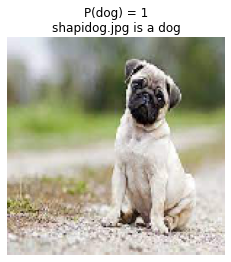

In [27]:
utilities.pred_binary_dir(model2, test_dir, cat0='cat', cat1='dog')

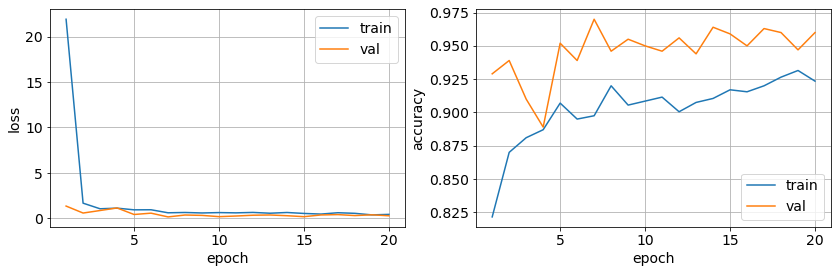

In [28]:
utilities.plot_train_val_metrics(history2, ('loss','accuracy'))